<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Airflight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#
%matplotlib inline

In [25]:
train = pd.read_csv("/content/Train.csv",parse_dates=['Date_of_Journey'])
test = pd.read_csv("/content/Test.csv",parse_dates=['Date_of_Journey'])

In [14]:
train.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,2019-09-04,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943
1,1,IndiGo,2019-03-06,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823
2,2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210
3,3,Multiple carriers,2019-05-27,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005
4,4,Air India,2019-06-06,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


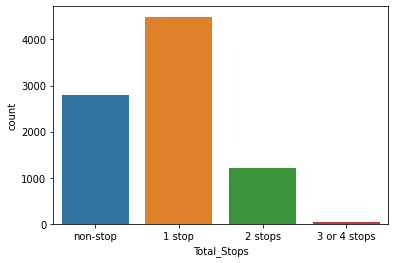

In [5]:
sns.countplot(train['Total_Stops'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


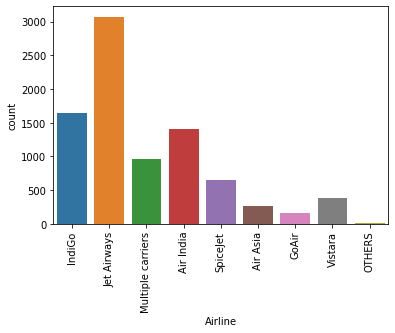

In [7]:
plt.xticks(rotation=90)
sns.countplot(train['Airline'])
plt.show()

In [26]:
train['Additional_Info'] = train['Additional_Info'].apply(lambda x : x.upper())
test['Additional_Info'] = test['Additional_Info'].apply(lambda x : x.upper())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


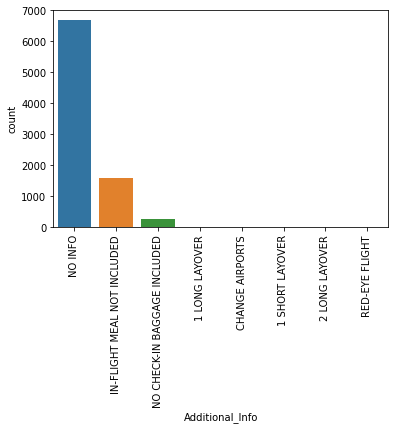

In [12]:
plt.xticks(rotation=90)
sns.countplot(train['Additional_Info'])

In [27]:
train['Month'] = train['Date_of_Journey'].dt.month_name()

In [28]:
test['Month'] = test['Date_of_Journey'].dt.month_name()

In [29]:
train['Day_Of_Week'] = train['Date_of_Journey'].dt.day_name()
test['Day_Of_Week'] = test['Date_of_Journey'].dt.day_name()

In [30]:
train.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day_Of_Week
0,0,IndiGo,2019-09-04,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,NO INFO,3943,September,Wednesday
1,1,IndiGo,2019-03-06,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,NO INFO,4823,March,Wednesday
2,2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,IN-FLIGHT MEAL NOT INCLUDED,3210,September,Friday
3,3,Multiple carriers,2019-05-27,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,NO INFO,7005,May,Monday
4,4,Air India,2019-06-06,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,NO INFO,13381,June,Thursday


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id               8533 non-null   int64         
 1   Airline          8533 non-null   object        
 2   Date_of_Journey  8533 non-null   datetime64[ns]
 3   Source           8533 non-null   object        
 4   Destination      8533 non-null   object        
 5   Dep_Time         8533 non-null   object        
 6   Arrival_Time     8533 non-null   object        
 7   Duration         8533 non-null   object        
 8   Total_Stops      8533 non-null   object        
 9   Additional_Info  8533 non-null   object        
 10  Price            8533 non-null   int64         
 11  Month            8533 non-null   object        
 12  Day_Of_Week      8533 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 866.8+ KB


In [35]:
train['Dep_Time_num'] = train['Dep_Time'].apply(lambda x : int(x.replace(":",""))/ 100)
test['Dep_Time_num'] = test['Dep_Time'].apply(lambda x : int(x.replace(":",""))/ 100)

In [39]:
def strip_func(x):
  lst = x.split(" ")
  if len(lst) > 1:
    return lst[1]
  else:
    return lst[0]
print(strip_func("07-06-2021 07:40") )
print(strip_func("07:40") )

07:40
07:40


In [40]:
train['Arrival_Time'] = train['Arrival_Time'].apply(lambda x : strip_func(x))

In [41]:
test['Arrival_Time'] = test['Arrival_Time'].apply(lambda x : strip_func(x))

In [42]:
train.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day_Of_Week,Dep_Time_num
0,0,IndiGo,2019-09-04,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,NO INFO,3943,September,Wednesday,4.00
1,1,IndiGo,2019-03-06,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,NO INFO,4823,March,Wednesday,8.30
2,2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,IN-FLIGHT MEAL NOT INCLUDED,3210,September,Friday,19.35
3,3,Multiple carriers,2019-05-27,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,NO INFO,7005,May,Monday,12.50
4,4,Air India,2019-06-06,Delhi,Cochin,06:50,07:40,24h 50m,2 stops,NO INFO,13381,June,Thursday,6.50


In [43]:
train['Arrival_Time_num'] = train['Arrival_Time'].apply(lambda x : int(x.replace(":",""))/ 100)
test['Arrival_Time_num'] = test['Arrival_Time'].apply(lambda x : int(x.replace(":",""))/ 100)

In [44]:
train.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day_Of_Week,Dep_Time_num,Arrival_Time_num
0,0,IndiGo,2019-09-04,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,NO INFO,3943,September,Wednesday,4.00,6.50
1,1,IndiGo,2019-03-06,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,NO INFO,4823,March,Wednesday,8.30,11.20
2,2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,IN-FLIGHT MEAL NOT INCLUDED,3210,September,Friday,19.35,21.05
3,3,Multiple carriers,2019-05-27,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,NO INFO,7005,May,Monday,12.50,21.00
4,4,Air India,2019-06-06,Delhi,Cochin,06:50,07:40,24h 50m,2 stops,NO INFO,13381,June,Thursday,6.50,7.40


In [45]:
train['Dep_Time_mins'] = train['Dep_Time_num'] * 60
test['Dep_Time_mins'] = test['Dep_Time_num'] * 60
#
train['Arrival_Time_mins'] = train['Arrival_Time_num'] * 60
test['Arrival_Time_mins'] = test['Arrival_Time_num'] * 60

In [46]:
train.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day_Of_Week,Dep_Time_num,Arrival_Time_num,Dep_Time_mins,Arrival_Time_mins
0,0,IndiGo,2019-09-04,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,NO INFO,3943,September,Wednesday,4.00,6.50,240.0,390.0
1,1,IndiGo,2019-03-06,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,NO INFO,4823,March,Wednesday,8.30,11.20,498.0,672.0
2,2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,IN-FLIGHT MEAL NOT INCLUDED,3210,September,Friday,19.35,21.05,1161.0,1263.0
3,3,Multiple carriers,2019-05-27,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,NO INFO,7005,May,Monday,12.50,21.00,750.0,1260.0
4,4,Air India,2019-06-06,Delhi,Cochin,06:50,07:40,24h 50m,2 stops,NO INFO,13381,June,Thursday,6.50,7.40,390.0,444.0


In [47]:
train['Duration_mins'] = train['Arrival_Time_mins']  - train['Dep_Time_mins']
test['Duration_mins'] = test['Arrival_Time_mins']  - test['Dep_Time_mins']

In [48]:
train.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day_Of_Week,Dep_Time_num,Arrival_Time_num,Dep_Time_mins,Arrival_Time_mins,Duration_mins
0,0,IndiGo,2019-09-04,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,NO INFO,3943,September,Wednesday,4.00,6.50,240.0,390.0,150.0
1,1,IndiGo,2019-03-06,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,NO INFO,4823,March,Wednesday,8.30,11.20,498.0,672.0,174.0
2,2,Jet Airways,2019-09-06,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,IN-FLIGHT MEAL NOT INCLUDED,3210,September,Friday,19.35,21.05,1161.0,1263.0,102.0
3,3,Multiple carriers,2019-05-27,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,NO INFO,7005,May,Monday,12.50,21.00,750.0,1260.0,510.0
4,4,Air India,2019-06-06,Delhi,Cochin,06:50,07:40,24h 50m,2 stops,NO INFO,13381,June,Thursday,6.50,7.40,390.0,444.0,54.0


In [49]:
drop_cols = ['Id','Date_of_Journey','Dep_Time','Arrival_Time','Duration']
train_new = train.drop(drop_cols,axis=1)
test_new = test.drop(drop_cols,axis=1)

In [50]:
train_new.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day_Of_Week,Dep_Time_num,Arrival_Time_num,Dep_Time_mins,Arrival_Time_mins,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,NO INFO,3943,September,Wednesday,4.00,6.50,240.0,390.0,150.0
1,IndiGo,Banglore,Delhi,non-stop,NO INFO,4823,March,Wednesday,8.30,11.20,498.0,672.0,174.0
2,Jet Airways,Mumbai,Hyderabad,non-stop,IN-FLIGHT MEAL NOT INCLUDED,3210,September,Friday,19.35,21.05,1161.0,1263.0,102.0
3,Multiple carriers,Delhi,Cochin,1 stop,NO INFO,7005,May,Monday,12.50,21.00,750.0,1260.0,510.0
4,Air India,Delhi,Cochin,2 stops,NO INFO,13381,June,Thursday,6.50,7.40,390.0,444.0,54.0


In [51]:
cat_cols = [ col for col in train_new.columns if train_new[col].dtypes == 'O']

In [52]:
num_cols = [col for col in train_new.columns if train_new[col].dtypes != 'O']

In [63]:
num_cols

['Price',
 'Dep_Time_num',
 'Arrival_Time_num',
 'Dep_Time_mins',
 'Arrival_Time_mins',
 'Duration_mins']

In [67]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            8533 non-null   object 
 1   Source             8533 non-null   object 
 2   Destination        8533 non-null   object 
 3   Total_Stops        8533 non-null   object 
 4   Additional_Info    8533 non-null   object 
 5   Price              8533 non-null   int64  
 6   Month              8533 non-null   object 
 7   Day_Of_Week        8533 non-null   object 
 8   Dep_Time_num       8533 non-null   float64
 9   Arrival_Time_num   8533 non-null   float64
 10  Dep_Time_mins      8533 non-null   float64
 11  Arrival_Time_mins  8533 non-null   float64
 12  Duration_mins      8533 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 866.8+ KB


In [68]:
cat_cols

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Month',
 'Day_Of_Week']

In [70]:
cat_features_index

array([0, 1, 2, 3, 4, 6, 7])

In [71]:
for cols in cat_cols:
  train_new[cols] = train_new[cols].astype(str)
  test_new[cols] = test_new[cols].astype(str)

In [72]:
cat_features_index = np.where(train_new.dtypes == object)[0]

Multicolinearity check

In [56]:
def check_mult_col(df,target,threshold =0.75):
  corr =  train.drop(target,axis=1).corr().abs()
  up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  #print(up_tri)
  #find all features having a correlation > threshold
  correlated_features = [col for col in up_tri.columns if any(up_tri[col] > threshold)]
  #print(f"The correlated features which can be dropped are :{correlated_features}")
  return correlated_features

In [57]:
check_mult_col(train_new,'Price',threshold =0.90)

['Dep_Time_mins', 'Arrival_Time_mins']

In [58]:
!pip install catboost

     |████████████████████████████████| 65.8MB 58kB/s 


In [59]:
from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import *

In [60]:
X = train_new.drop('Price',axis=1)
Y = train_new['Price']

In [82]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0007,0.005, 0.01],
    'n_estimators': [100,250,300,500],
    'random_state' : [42,100,500,720]
    }
catboost = CatBoostRegressor(objective='RMSE')
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 10.3min finished


0:	learn: 4330.6400695	total: 12ms	remaining: 5.97s
1:	learn: 4307.3186270	total: 27.2ms	remaining: 6.76s
2:	learn: 4280.6817739	total: 37.4ms	remaining: 6.2s
3:	learn: 4253.8231541	total: 50.4ms	remaining: 6.25s
4:	learn: 4227.5104627	total: 62.1ms	remaining: 6.14s
5:	learn: 4203.6076547	total: 71.3ms	remaining: 5.87s
6:	learn: 4178.2000434	total: 83.2ms	remaining: 5.86s
7:	learn: 4152.4674979	total: 93.4ms	remaining: 5.75s
8:	learn: 4126.9225741	total: 104ms	remaining: 5.66s
9:	learn: 4101.6932527	total: 112ms	remaining: 5.49s
10:	learn: 4077.0385621	total: 121ms	remaining: 5.36s
11:	learn: 4052.3556544	total: 129ms	remaining: 5.24s
12:	learn: 4028.8156356	total: 141ms	remaining: 5.28s
13:	learn: 4004.3913196	total: 149ms	remaining: 5.19s
14:	learn: 3984.1437058	total: 159ms	remaining: 5.14s
15:	learn: 3960.9277963	total: 182ms	remaining: 5.5s
16:	learn: 3937.9089677	total: 191ms	remaining: 5.42s
17:	learn: 3915.3170081	total: 199ms	remaining: 5.33s
18:	learn: 3894.2614550	total: 208

Streaming output truncated to the last 5000 lines.
17:	learn: 3969.7609322	total: 138ms	remaining: 3.7s
18:	learn: 3948.4978541	total: 147ms	remaining: 3.71s
19:	learn: 3927.0029918	total: 153ms	remaining: 3.68s
20:	learn: 3905.1076832	total: 160ms	remaining: 3.66s
21:	learn: 3883.8691681	total: 170ms	remaining: 3.69s
22:	learn: 3862.4525379	total: 176ms	remaining: 3.65s
23:	learn: 3841.2401351	total: 182ms	remaining: 3.62s
24:	learn: 3824.2418208	total: 190ms	remaining: 3.6s
25:	learn: 3804.1522246	total: 196ms	remaining: 3.57s
26:	learn: 3784.4961123	total: 203ms	remaining: 3.55s
27:	learn: 3767.3256842	total: 211ms	remaining: 3.56s
28:	learn: 3748.0603266	total: 217ms	remaining: 3.52s
29:	learn: 3728.7475170	total: 224ms	remaining: 3.51s
30:	learn: 3709.3634619	total: 231ms	remaining: 3.49s
31:	learn: 3691.0489307	total: 237ms	remaining: 3.46s
32:	learn: 3672.3635347	total: 244ms	remaining: 3.45s
33:	learn: 3654.1699284	total: 250ms	remaining: 3.42s
34:	learn: 3635.8097295	total: 25

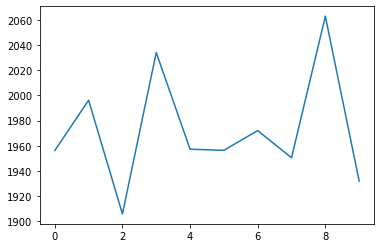

In [84]:
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.01, n_estimators =500, random_state = 720,objective='RMSE')    

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [87]:
y_pred = model.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test,y_pred))

1947.3035669038911

In [92]:
r2_score(y_test,y_pred)

0.7955673306969706

In [89]:
price = grid.best_estimator_.predict(test_new)

In [90]:
test['Price'] = price

In [93]:
test.head()

,Id,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day_Of_Week,Dep_Time_num,Arrival_Time_num,Dep_Time_mins,Arrival_Time_mins,Duration_mins,Price
0,0,SpiceJet,2019-12-05,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,NO INFO,December,Thursday,15.05,20.20,903.0,1212.0,309.0,6548.677001
1,1,Air India,2019-03-15,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,NO INFO,March,Friday,18.05,21.10,1083.0,1266.0,183.0,5826.436350
2,2,Jet Airways,2019-06-24,Delhi,Cochin,11:45,04:25,16h 40m,2 stops,NO INFO,June,Monday,11.45,4.25,687.0,255.0,-432.0,14792.531197
3,3,SpiceJet,2019-06-21,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,NO INFO,June,Friday,9.00,11.25,540.0,675.0,135.0,4302.108903
4,4,IndiGo,2019-04-27,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,NO INFO,April,Saturday,14.25,16.55,855.0,993.0,138.0,4632.530862


In [94]:
test[['Id','Price']].to_csv('Submission_2.csv',index=False)